In [1]:
from GPGO import BayesianOptimization,GP,RBF
import numpy as np

# Function to Optimize: HARTMANN 6 Dimensional Function
<img src="http://i.imgur.com/kQ8KydD.png">
To optimize on the hypercube $x_i$  ∈ (0, 1), for all i = 1, …, 6 

## Global Minimum
<img src="http://i.imgur.com/EE8WAho.png">

In [2]:

def hartmann_6D(x):
    alpha = np.array([[1.], [1.2], [3.], [3.2]])

    A = np.array([[10, 3, 17, 3.50, 1.7, 8],
                  [0.05, 10, 17, 0.1, 8, 14],
                  [3, 3.5, 1.7, 10, 17, 8],
                  [17, 8, 0.05, 10, 0.1, 14]])

    P = 10 ** -4 * np.array([[1312, 1696, 5569, 124, 8283, 5886],
                             [2329, 4135, 8307, 3736, 1004, 9991],
                             [2348, 1451, 3522, 2883, 3047, 6650],
                             [4047, 8828, 8732, 5743, 1091, 381]])

    def comp(i):
        tot = 0
        for j in range(6):
            tot += A[i][j] * (x.T[j] - P[i][j]) ** 2
        return np.exp(-tot)

    f = 0
    for i in range(4):
        f += -(alpha[i] * comp(i))

    return f[:, None]



In [8]:
dim = 6
points = 3
x = np.random.uniform(0, 1, (points, dim))
y = hartmann_6D(x)
gp = GP(x, y, RBF(gradient=False))
gp.fit()
settings = {"type": "BFGS",
            "ac_type":"EI",
            "n_search": 10,
            "boundaries": [[0, 1] for i in range(6)],
            "epsilon": 0.01,
            "iteration": 50,
            "minimization": True,
            "optimization": True,
            "n_restart": 10,
            "sampling": np.random.uniform}

BayOpt = BayesianOptimization(x, y, settings, gp, hartmann_6D)


/home/merk/PycharmProjects/GPoptPy/GPGO/GaussianProcess/GP.py:161: RuntimeWarning: invalid value encountered in log
  - .5 * K.shape[0] * np.log(2 * np.pi)


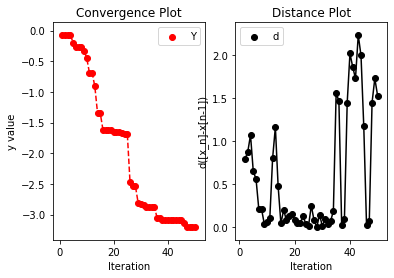

In [9]:
result = BayOpt.run()

In [10]:
print(result)

(array([0.26347953, 0.16832597, 0.4747593 , 0.25800948, 0.34429534,
       0.64264603]), array([-3.20360854]))
